In [148]:
import json
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))  # Add the src directory to path 
from src.plot import plot_quant_vs_ogtt
from src.utils import tight_bbox

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False  # https://stackoverflow.com/questions/43102564/matplotlib-negative-numbers-on-tick-labels-displayed-as-boxes
plt.style.use('seaborn-ticks')  # 'seaborn-ticks'
sns.set_style('ticks')
import numpy as np
import seaborn as sns 

In [21]:
colors = json.load(open(r'..\data\metadata\color_schemes.json'))
colors['Non-fasted'] = colors['RBG']
colors['Fasted'] = colors['FBG']
compound_superclasses = json.load(open('../data/metadata/compound_superclasses.json', 'r'))
    
data = pd.read_csv(r'../data/processed/combined_metabolites_data_with_model_params.csv').set_index('i')
data_cols = data.filter(regex='_FBG|_RBG').columns
fbg_cols = data.filter(regex='_FBG').columns
rbg_cols = data.filter(regex='_RBG').columns

ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

In [38]:
data['signif_interaction'] = data['qval_sampling:ogtt'] < 0.05
data['signif_sampling'] = data['qval_sampling'] < 0.05
gb_means = (data
            .loc[:, data_cols]
            .groupby(fg['bg_type'], axis=1)
            .mean()
           )

data['fasted_mean'] = gb_means['FBG']
data['fed_mean'] = gb_means['RBG']
data['Log2 Fold Change'] = data['fed_mean'] - data['fasted_mean']

data['Fed - Fasted slope'] = data['coef_fed'] - data['coef_fasted']
data['signif_sampling'] = data['qval_sampling'] < 0.05
data['signif_interact'] = data['qval_sampling:ogtt'] < 0.05
data['log_qval_sampling'] = -np.log10(data['qval_sampling'])
data['log_qval_ogtt'] = -np.log10(data['qval_ogtt'])
data['log_qval_sampling:ogtt'] = -np.log10(data['qval_sampling:ogtt'])
data['is_id'] = data['superclass'] != 'Unidentified'

In [5]:
# df = data[data_cols].T.copy()
# df = (df
# #     .join(fg['bg_type'])
#     .groupby(fg['bg_type'])
#     .mean()
#      )
# # display(df)
# fc = ((df.loc['RBG'] - df.loc['FBG'])
#       .to_frame('Log2 Fold Change')
# #       .join(-np.log10(data[['qval_sampling', 'qval_ogtt', 'qval_sampling:ogtt']]))
#       .join(data[['qval_sampling', 'qval_ogtt', 'qval_sampling:ogtt', 
#                   'superclass', 'coef_fasted', 'coef_fed', 'model_param_ogtt', 'Type']])
#      )
# display(fc)
# fc['Fed - Fasted slope'] = fc['coef_fed'] - fc['coef_fasted']
# fc['signif_sampling'] = fc['qval_sampling'] < 0.05
# fc['signif_interact'] = fc['qval_sampling:ogtt'] < 0.05
# fc['log_qval_sampling'] = -np.log10(fc['qval_sampling'])
# fc['log_qval_ogtt'] = -np.log10(fc['qval_ogtt'])
# fc['log_qval_sampling:ogtt'] = -np.log10(fc['qval_sampling:ogtt'])
# fc['is_id'] = fc['superclass'] != 'Unidentified'
# fc

,Log2 Fold Change,qval_sampling,qval_ogtt,qval_sampling:ogtt,superclass,coef_fasted,coef_fed,model_param_ogtt,Type
i,,,,,,,,,
m_0,0.277452,6.166626e-01,0.000123,0.807953,Unidentified,0.000078,0.000093,0.000078,metabolite
m_1,0.932597,1.019026e-12,0.000017,0.000577,Unidentified,0.000001,0.000037,0.000001,metabolite
m_2,-0.340412,1.781987e-01,0.583384,0.786415,Nitrogen heterocycle,-0.000002,-0.000010,-0.000002,metabolite
m_3,-0.697301,3.269217e-10,0.128993,0.692485,Nitrogen heterocycle,-0.000009,-0.000004,-0.000009,metabolite
m_4,0.898423,3.473345e-01,0.056097,0.330235,Nitrogen heterocycle,-0.000121,-0.000032,-0.000121,metabolite
...,...,...,...,...,...,...,...,...,...
l_912,0.527198,1.274822e-02,0.001393,0.015366,Glycerolipid,0.000003,0.000051,0.000003,lipid
l_913,0.658842,5.508272e-02,0.253227,0.014866,Unidentified,-0.000025,0.000054,-0.000025,lipid
l_914,-1.419139,1.849586e-08,0.240940,0.008933,Unidentified,-0.000018,0.000038,-0.000018,lipid


,Log2 Fold Change,qval_sampling,qval_ogtt,qval_sampling:ogtt,superclass,coef_fasted,coef_fed,model_param_ogtt,Type,Fed - Fasted slope,signif_sampling,signif_interact,log_qval_sampling,log_qval_ogtt,log_qval_sampling:ogtt,is_id
i,,,,,,,,,,,,,,,,
m_0,0.277452,6.166626e-01,0.000123,0.807953,Unidentified,0.000078,0.000093,0.000078,metabolite,0.000015,False,False,0.209952,3.910703,0.092614,False
m_1,0.932597,1.019026e-12,0.000017,0.000577,Unidentified,0.000001,0.000037,0.000001,metabolite,0.000036,True,True,11.991815,4.758906,3.238921,False
m_2,-0.340412,1.781987e-01,0.583384,0.786415,Nitrogen heterocycle,-0.000002,-0.000010,-0.000002,metabolite,-0.000008,False,False,0.749096,0.234045,0.104348,True
m_3,-0.697301,3.269217e-10,0.128993,0.692485,Nitrogen heterocycle,-0.000009,-0.000004,-0.000009,metabolite,0.000004,True,False,9.485556,0.889435,0.159590,True
m_4,0.898423,3.473345e-01,0.056097,0.330235,Nitrogen heterocycle,-0.000121,-0.000032,-0.000121,metabolite,0.000089,False,False,0.459252,1.251058,0.481177,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l_912,0.527198,1.274822e-02,0.001393,0.015366,Glycerolipid,0.000003,0.000051,0.000003,lipid,0.000049,True,True,1.894550,2.855954,1.813447,True
l_913,0.658842,5.508272e-02,0.253227,0.014866,Unidentified,-0.000025,0.000054,-0.000025,lipid,0.000079,False,True,1.258985,0.596491,1.827806,False
l_914,-1.419139,1.849586e-08,0.240940,0.008933,Unidentified,-0.000018,0.000038,-0.000018,lipid,0.000057,True,True,7.732926,0.618091,2.048989,False


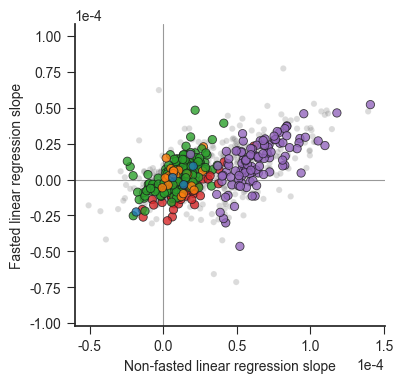

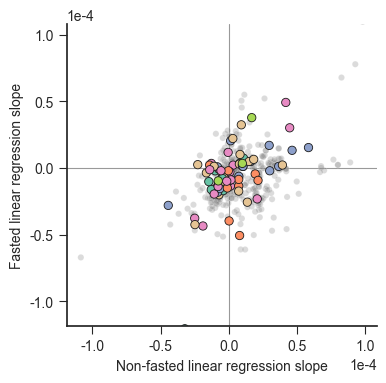

In [39]:
def fasted_fed_slope(_type, ax=None, alpha=0.8, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,4), dpi=100)
    sns.scatterplot(
        data=data.loc[(data['superclass'] != 'Unidentified') & (data['Type'] == _type)],
        x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors, 
#         s=30, linewidth=0.5, edgecolor='gray',
        edgecolor='0.1', linewidth=0.6,
        alpha=alpha, legend=legend)
    sns.scatterplot(
        data=data.loc[(data['superclass'] == 'Unidentified') & (data['Type'] == _type)],
        x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors, s=20,
        alpha=0.28, zorder=-10, legend=legend)

    ###### 2 options for making sure the axes are equally scaled to not bias against non-fasted:
    ########## 1. ax.set_aspect('equal') enforces square, but distorts plot
    ########## 2. ylim average +/- 0.5 * xlim range 
    avg_ylim = np.mean([y for y in ax.get_ylim()])
    xlim_range = abs(ax.get_xlim()[0] - ax.get_xlim()[1])
    ax.set_ylim(avg_ylim-0.5*xlim_range, avg_ylim+0.5*xlim_range)
    ax.set_ylabel('Fasted linear regression slope')
    ax.set_xlabel('Non-fasted linear regression slope')
    ax.ticklabel_format(style='sci', scilimits=(-1, 1))
    ax.axvline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
    ax.axhline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
    if legend:
        ax.legend(loc=(0.8, 0.05), markerscale=1.2)
    sns.despine()

fasted_fed_slope('lipid', alpha=0.8)
fasted_fed_slope('metabolite', alpha=1)

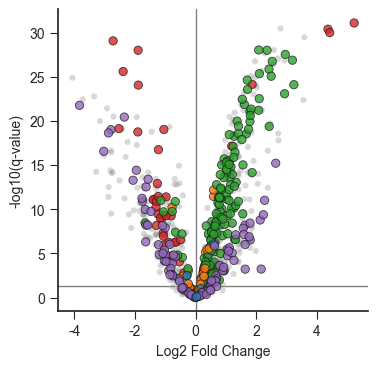

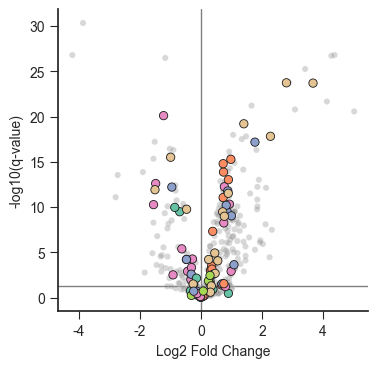

In [7]:
def volcano(x, y, df, metab_type, alpha=0.8, ax=None, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,4), dpi=100)
    sns.scatterplot(
        data=df.loc[(df['superclass'] != 'Unidentified') & (df['Type'] == metab_type)], 
        x=x, y=y, hue='superclass', palette=colors, 
#         s=30, linewidth=0.2, edgecolor='gray',
        edgecolor='0.1', linewidth=0.6,
        ax=ax, alpha=alpha, legend=legend)
    sns.scatterplot(
        data=df.loc[(df['superclass'] == 'Unidentified') & (df['Type'] == metab_type)], 
        x=x, y=y, hue='superclass', palette=colors, ax=ax, 
        s=20,
        alpha=0.3, zorder=-10, legend=legend)
    ax.ticklabel_format(style='sci', scilimits=(-2, 2))
    ax.set_ylabel('-log10(q-value)')
    if legend:
        ax.legend(loc=(1.01, 0.1), markerscale=1.2)
#     ax.set_title(y)
    ax.axvline(0, linewidth=1, c='0.5', zorder=-99)
    ax.axhline(-np.log10(0.05), linewidth=1, c='0.5', zorder=-99)
    sns.despine()
volcano(x='Log2 Fold Change', y='log_qval_sampling', df=fc, metab_type='lipid')
volcano(x='Log2 Fold Change', y='log_qval_sampling', df=fc, metab_type='metabolite', alpha=1)

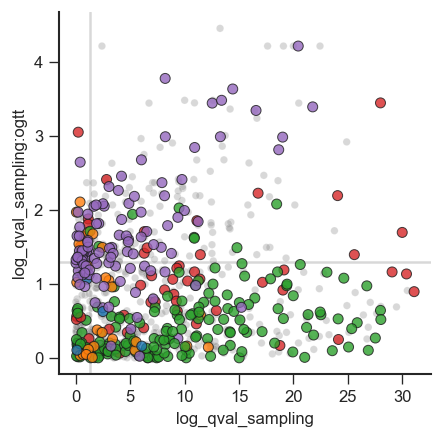

In [8]:
def pvals_plot(x, y, df, metab_type, alpha=0.8, ax=None, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,4), dpi=120)
    sns.scatterplot(
        data=df.loc[(df['is_id'] == True) & (df['Type'] == metab_type)], 
        x=x, y=y, hue='superclass', palette=colors,
        edgecolor='0.1', linewidth=0.6, ax=ax, legend=legend, alpha=alpha)
    sns.scatterplot(
        data=df.loc[(df['is_id'] == False) & (df['Type'] == metab_type)], 
        x=x, y=y, hue='superclass', palette=colors, s=20, ax=ax, legend=legend, alpha=0.3, zorder=-10)
    ax.axhline(-np.log10(0.05), c='gray', alpha=0.3, zorder=-99)
    ax.axvline(-np.log10(0.05), c='gray', alpha=0.3, zorder=-99)
    if legend:
        ax.legend(loc=(1.01, 0.1), markerscale=1.2)
    sns.despine()
pvals_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, metab_type='lipid')

# Combine all the plots

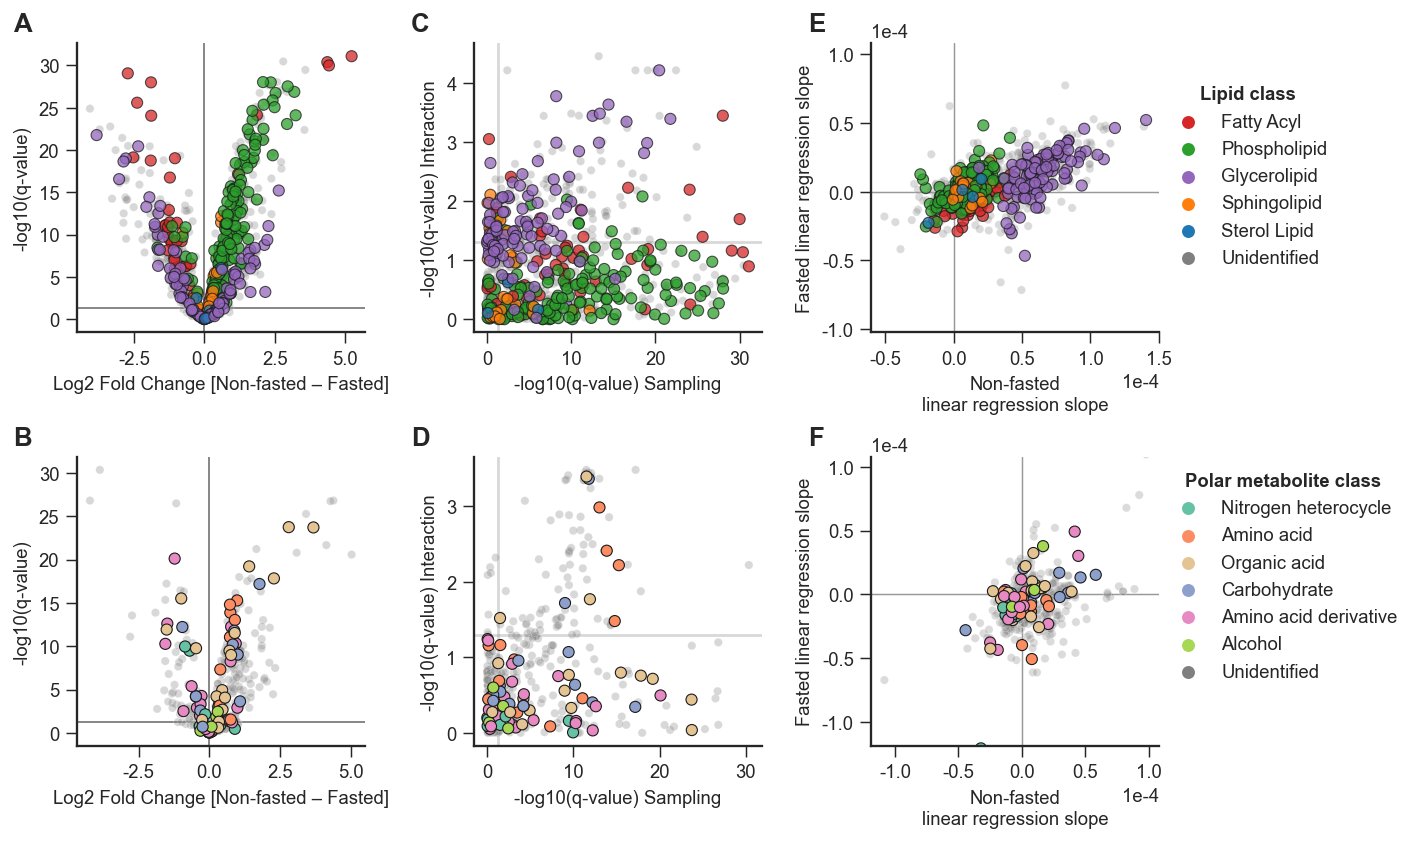

In [9]:
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10.5, 7), dpi=133,
                        gridspec_kw={'hspace': 0.43, 'wspace': 0.38})

ax1 = axs[0][0]
ax2 = axs[1][0]
volcano(x='Log2 Fold Change', y='log_qval_sampling', df=fc, metab_type='lipid', ax=ax1, alpha=0.75)
volcano(x='Log2 Fold Change', y='log_qval_sampling', df=fc, metab_type='metabolite', ax=ax2, alpha=1)
ax1.set_xlabel('Log2 Fold Change [Non-fasted – Fasted]')
ax2.set_xlabel('Log2 Fold Change [Non-fasted – Fasted]')

# volcano(x='Log2 Fold Change', y='log_qval_sampling:ogtt', df=fc, metab_type='lipid', ax=axs[0][1], alpha=0.8)
# volcano(x='Log2 Fold Change', y='log_qval_sampling:ogtt', df=fc, metab_type='metabolite', ax=axs[1][1], alpha=1)

ax1 = axs[0][1]
ax2 = axs[1][1]
pvals_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, metab_type='lipid', ax=ax1, alpha=0.75)
pvals_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, metab_type='metabolite', ax=ax2, alpha=1)
ax1.set_xlabel('-log10(q-value) Sampling')
ax2.set_xlabel('-log10(q-value) Sampling')
ax1.set_ylabel('-log10(q-value) Interaction')
ax2.set_ylabel('-log10(q-value) Interaction')

ax1 = axs[0][2]
ax2 = axs[1][2]
fasted_fed_slope('lipid',      ax=ax1, alpha=0.75, legend=True)
fasted_fed_slope('metabolite', ax=ax2, alpha=1, legend=True)
ax1.legend(loc=(1.01, 0.2), title='Lipid class',  title_fontproperties={'weight':'bold'})
ax2.legend(loc=(1.01, 0.2), title='Polar metabolite class',  title_fontproperties={'weight':'bold'})
ax1.set_xlabel('Non-fasted\nlinear regression slope')
ax2.set_xlabel('Non-fasted\nlinear regression slope')

label = iter('ABCDEFGHIJ'[:nrows*ncols])
for col in range(ncols):
    for row in range(nrows):
        ax = axs[row][col]
        ax.text(s=next(label), x=-0.22, y=1.04, transform=ax.transAxes, fontsize=14, fontweight='bold')

# plt.savefig(r'../reports/figures/Figure_omics/volcano-pvalpval-slopeslope-plots.pdf', dpi=150, bbox_inches='tight')
# plt.savefig(r'../reports/figures/Figure_omics/volcano-pvalpval-slopeslope-plots.png', dpi=150, bbox_inches='tight')

# Volcano plots of molecule classes known to be important to diabetes
1. TG
2. PC
3. PE
4. LysoPC
5. LysoPE 
6. BCAAs

In [23]:
fc

,Log2 Fold Change,qval_sampling,qval_ogtt,qval_sampling:ogtt,superclass,coef_fasted,coef_fed,model_param_ogtt,Type,Fed - Fasted slope,signif_sampling,signif_interact,log_qval_sampling,log_qval_ogtt,log_qval_sampling:ogtt,is_id
i,,,,,,,,,,,,,,,,
m_0,0.277452,6.166626e-01,0.000123,0.807953,Unidentified,0.000078,0.000093,0.000078,metabolite,0.000015,False,False,0.209952,3.910703,0.092614,False
m_1,0.932597,1.019026e-12,0.000017,0.000577,Unidentified,0.000001,0.000037,0.000001,metabolite,0.000036,True,True,11.991815,4.758906,3.238921,False
m_2,-0.340412,1.781987e-01,0.583384,0.786415,Nitrogen heterocycle,-0.000002,-0.000010,-0.000002,metabolite,-0.000008,False,False,0.749096,0.234045,0.104348,True
m_3,-0.697301,3.269217e-10,0.128993,0.692485,Nitrogen heterocycle,-0.000009,-0.000004,-0.000009,metabolite,0.000004,True,False,9.485556,0.889435,0.159590,True
m_4,0.898423,3.473345e-01,0.056097,0.330235,Nitrogen heterocycle,-0.000121,-0.000032,-0.000121,metabolite,0.000089,False,False,0.459252,1.251058,0.481177,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l_912,0.527198,1.274822e-02,0.001393,0.015366,Glycerolipid,0.000003,0.000051,0.000003,lipid,0.000049,True,True,1.894550,2.855954,1.813447,True
l_913,0.658842,5.508272e-02,0.253227,0.014866,Unidentified,-0.000025,0.000054,-0.000025,lipid,0.000079,False,True,1.258985,0.596491,1.827806,False
l_914,-1.419139,1.849586e-08,0.240940,0.008933,Unidentified,-0.000018,0.000038,-0.000018,lipid,0.000057,True,True,7.732926,0.618091,2.048989,False


In [68]:
fig.

In [ ]:
sns.FacetGrid

In [92]:
fig.get_axes()

[<AxesSubplot:title={'center':'molec_class = AC'}, ylabel='log_qval_sampling'>,
 <AxesSubplot:title={'center':'molec_class = Unidentified'}>,
 <AxesSubplot:title={'center':'molec_class = LysoPC'}>,
 <AxesSubplot:title={'center':'molec_class = LysoPE'}>,
 <AxesSubplot:title={'center':'molec_class = FA'}, ylabel='log_qval_sampling'>,
 <AxesSubplot:title={'center':'molec_class = PC'}>,
 <AxesSubplot:title={'center':'molec_class = Alkenyl-DG'}>,
 <AxesSubplot:title={'center':'molec_class = PI'}>,
 <AxesSubplot:title={'center':'molec_class = SM'}, ylabel='log_qval_sampling'>,
 <AxesSubplot:title={'center':'molec_class = Plasmenyl-PC'}>,
 <AxesSubplot:title={'center':'molec_class = Plasmanyl-PC'}>,
 <AxesSubplot:title={'center':'molec_class = Plasmenyl-PE'}>,
 <AxesSubplot:title={'center':'molec_class = PE'}, ylabel='log_qval_sampling'>,
 <AxesSubplot:title={'center':'molec_class = Plasmanyl-PE'}, xlabel='Log2 Fold Change'>,
 <AxesSubplot:title={'center':'molec_class = Cer[NS]'}, xlabel='Log

C:\Users\bjanderson23\anaconda3\lib\site-packages\seaborn\axisgrid.py:434: UserWarning: `gridspec_kws` ignored when using `col_wrap`
  warnings.warn("`gridspec_kws` ignored when using `col_wrap`")


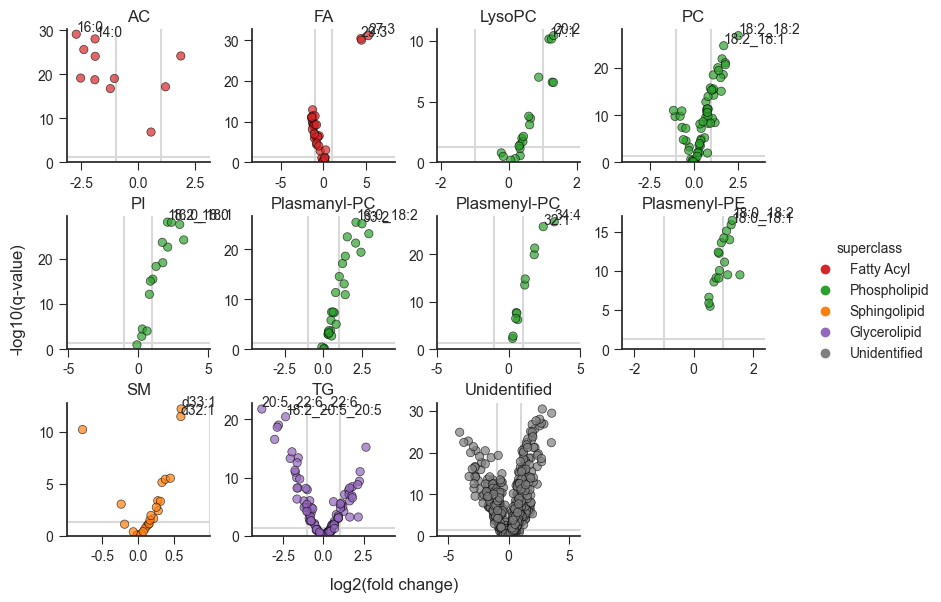

In [156]:
df = (data
    .loc[
        (data['molec_class'].map(data['molec_class'].value_counts()) > 10)
      & (data['Type'] == 'lipid') 
#     & (data['ID'] != 'Unidentified')
        ]
     .sort_values('molec_class'))

rp = sns.relplot(
    data=df,
    x='Log2 Fold Change', y='log_qval_sampling', hue='superclass', palette=colors,
    col='molec_class', 
    col_wrap=4,
    facet_kws=dict(
        sharey=False, 
        sharex=False,
#         legend_out=True,
        gridspec_kws=dict(hspace=0.15, wspace=0.01),
#         subplot_kws=dict(),
    ),
    linewidth=0.5, edgecolor='black', alpha=0.7,
)
fig = rp.fig
fig.set_size_inches(8, 6)
fig.set_dpi(100)
fig.legend(loc=(1.01, 0.3))
for ax, molec_class, letter in zip(fig.get_axes(), df['molec_class'].unique(), 'ABCDEFGHIJKLMNOPQRS'):
    maxlim = abs(max(ax.get_xlim()))
    ax.set(
        title=ax.get_title().lstrip('molec_class = '),
        xlim=(-1.5*maxlim, 1.5*maxlim),
        ylim=0,
        ylabel=None, 
        xlabel=None,
    )
    ax.axhline(-np.log10(0.05), color='0.85', zorder=-10)
    ax.axvline(1, color='0.85', zorder=-10)
    ax.axvline(-1, color='0.85', zorder=-10)
    
    if molec_class == 'Unidentified':
        continue
    mcdf = (df
            .loc[df['molec_class'] == molec_class]
            .sort_values('log_qval_sampling', ascending=False)
            .iloc[:2])
    for i, row in mcdf.iterrows():
        ax.annotate(text=row['ID'].lstrip(f'{molec_class} ').lstrip('O-'), 
                    xy=(row['Log2 Fold Change'], row['log_qval_sampling']), va='bottom', annotation_clip=False)
    
#     bb = tight_bbox(ax)
#     ax.text(x=bb.x0+0.1, y=bb.y1-0.03, s=letter, transform=ax.transAxes, fontweight='bold')

fig.supylabel('-log10(q-value)')
fig.supxlabel('log2(fold change)')

plt.tight_layout()

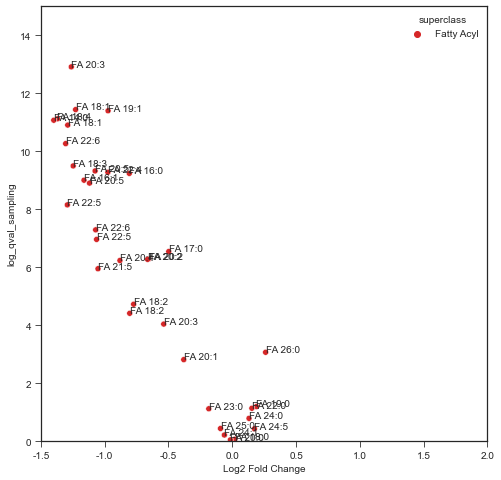

In [56]:
df = data.loc[(data['molec_class'] == 'FA')]
sns.scatterplot(
    data=df,
    x='Log2 Fold Change', y='log_qval_sampling', hue='superclass', palette=colors,
)

for i, row in df.iterrows():
    plt.annotate(xy=(row['Log2 Fold Change'], row['log_qval_sampling']), text=row['ID'])
    
plt.xlim(-1.5, 2)
plt.ylim(0, 15)
plt.gcf().set_size_inches(8, 8)

In [46]:
for (molec_class, _type), count in data[['molec_class', 'Type']].value_counts().iteritems():
#     print(molec_class)
    if molec_class == 'FA':
        sns.scatterplot(
            data=data.loc[(data['molec_class'] == molec_class) & (data['Type'] == _type)],
            x='Log2 Fold Change', y='log_qval_sampling', hue='superclass', palette=colors, ax=ax,
        )
        ax.set_title(f'{molec_class}')
    

In [47]:
data['molec_class'].unique()

array(['Unidentified', 'Nitrogen heterocycle', 'Amino acid',
       'Organic acid', 'Carbohydrate', 'Amino acid derivative', 'Alcohol',
       'AC', 'LysoPC', 'LysoPE', 'FA', 'PC', 'Alkenyl-DG', 'PI', 'SM',
       'Plasmenyl-PC', 'Plasmanyl-PC', 'Plasmenyl-PE', 'PE',
       'Plasmanyl-PE', 'Cer[NS]', 'TG', 'CE'], dtype=object)

In [72]:
# fig, ax = volcano(x='Fed - Fasted slope', y='qval_sampling:ogtt', df=fc, metab_type='lipid')
# ax.set_title('Sampling-OGTT glucose AUC Interaction')
# ax.set_xlabel('Non-fasted - Fasted slope')

In [73]:
# volcano(x='Fed - Fasted slope', y='qval_sampling:ogtt', df=fc, metab_type='metabolite', alpha=1)

# p-value vs. p-value plots

In [75]:
# relplot = sns.relplot(
#     data=fc.loc[fc['is_id']], x='log_qval_sampling', y='log_qval_sampling:ogtt', hue='superclass', palette=colors,
#     col='Type', 
# )
# fig = relplot.fig
# # legend = relplot.legend
# # legend = fig.axes[0].get_legend()
# legend = fig.legend()
# # legend(loc=(1.01, 0.5))
# # legend.(loc=(0.5, 0.5), )
# fig.set_size_inches((7, 4))
# fig.set_dpi(120)
# sns.despine()

Text(0, 0.5, '-log10(q-value interaction)')

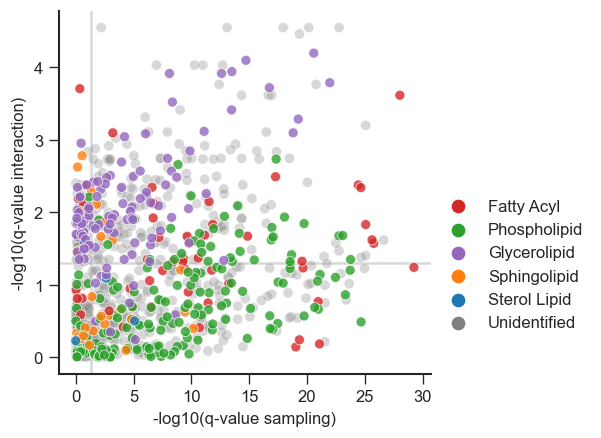

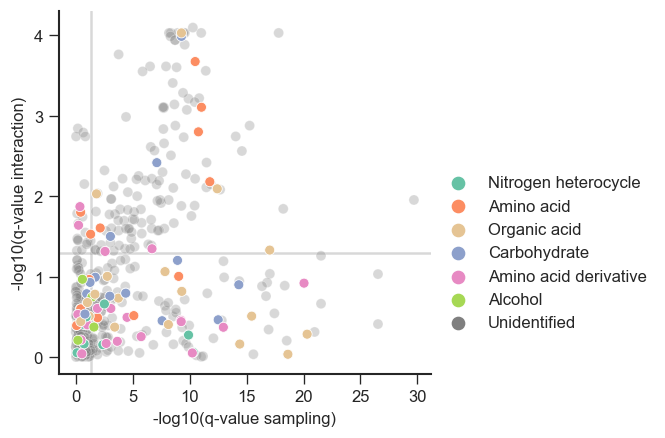

In [77]:
pval_pval_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, _type='lipid')
ax = plt.gca()
ax.set_xlabel('-log10(q-value sampling)')
ax.set_ylabel('-log10(q-value interaction)')

pval_pval_plot(x='log_qval_sampling', y='log_qval_sampling:ogtt', df=fc, _type='metabolite', alpha=1)
ax = plt.gca()
ax.set_xlabel('-log10(q-value sampling)')
ax.set_ylabel('-log10(q-value interaction)')

pval_pval_plot(x='log_qval_ogtt', y='log_qval_sampling:ogtt', df=fc, _type='lipid')
ax = plt.gca()
ax.set_xlabel('-log10(q-value OGTT glucose AUC)')
ax.set_ylabel('-log10(q-value interaction)')

pval_pval_plot(x='log_qval_ogtt', y='log_qval_sampling:ogtt', df=fc, _type='metabolite')
ax = plt.gca()
ax.set_xlabel('-log10(q-value OGTT glucose AUC)')
ax.set_ylabel('-log10(q-value interaction)')

In [61]:
ap.loc[~ap['lcms_sampled']]

,Nile rat label,Date of birth,litter,lcms_sampled,glucose_tolerance,OGTT(0min),OGTT(10min),OGTT(20min),OGTT(30min),OGTT(60min),...,Weightprefastweek12,HbA1c,Interscapular brown fat (g),BF (%BW),Inguinal white fat one side (g),WF (%BW),BF/WF,Plasma,Fatty liver,Notes
animal,,,,,,,,,,,,,,,,,,,,,
1061,NaN,2021-01-23,0,False,NaN,48.0,196.5,344.5,449.5,518.0,...,101.7,NaN,1.7808,1.751032,0.6059,0.595772,2.939099,murky,Slight,NaN
1063,NaN,2021-01-23,0,False,NaN,NaN,NaN,NaN,NaN,NaN,...,109.2,NaN,2.5485,2.333791,0.8614,0.788828,2.958556,NaN,No,OGTT failed Didn't collect tissue or post-OGTT...
1075,NaN,2021-01-23,0,False,NaN,169.0,355.0,600.0,600.0,569.5,...,105.5,NaN,1.3107,1.242370,0.5910,0.560190,2.217766,White,Yes,NaN
1080,NaN,2021-01-24,1,False,NaN,NaN,NaN,NaN,NaN,NaN,...,112.1,NaN,1.9369,1.727832,0.7754,0.691704,2.497937,NaN,No,OGTT failed Didn't collect tissue or post-OGTT...
1081,NaN,2021-01-24,1,False,NaN,171.0,345.0,547.0,600.0,563.0,...,113.2,NaN,1.3511,1.193551,0.6283,0.555035,2.150406,White,No,NaN
1094,NaN,2021-01-31,2,False,NaN,48.0,135.0,195.5,237.5,219.0,...,98.0,NaN,1.5393,1.570714,0.6410,0.654082,2.401404,clear,Slight,NaN
1095,NaN,2021-01-31,2,False,NaN,43.0,85.5,445.5,483.0,517.5,...,98.3,NaN,1.7470,1.777213,0.6412,0.652289,2.724579,clear,Very slight,OGTT (AUC): Animal stressed?
1096,NaN,2021-01-31,2,False,NaN,58.5,186.0,248.5,302.5,485.5,...,104.4,NaN,1.1691,1.119828,0.6014,0.576054,1.943964,clear,Slight,NaN
1100,NaN,2021-02-01,3,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,euthanized


In [64]:
ap[['OGTT (AUC)', 'lcms_sampled']]

,OGTT (AUC),lcms_sampled
animal,,
1060,48742.5,True
1061,46485.0,False
1062,43717.5,True
1063,NaN,False
1074,35250.0,True
1075,59782.5,False
1076,60245.0,True
1080,NaN,False
1081,59965.0,False
